In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/PPW/tugas

/content/drive/MyDrive/PPW/tugas


In [3]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [4]:
# Mengimpor modul yang diperlukan
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Load Data

In [ ]:
# Path ke file di Google Drive (ubah sesuai lokasimu)
file_path = '/content/drive/MyDrive/PPW/tugas/Tugas-Crawling-Data-Berita-2-kategori.csv'

# Baca file CSV
df = pd.read_csv(file_path)

In [ ]:
text = df['Isi Berita']

text

,Isi Berita
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,"TIMESINDONESIA, MALANG – Bakal cawabup Malang,..."
2,"TIMESINDONESIA, BANTUL – Rois Syuriah PCNU Ban..."
3,"TIMESINDONESIA, MOJOKERTO – Ribuan kader PKB K..."
4,"TIMESINDONESIA, JAKARTA – Partai Kebangkitan B..."
...,...
95,"TIMESINDONESIA, MALANG – Azquira Scarf menggel..."
96,"TIMESINDONESIA, MALANG – Pada Minggu (1/9/2024..."
97,"TIMESINDONESIA, SURABAYA – Memilih wewangian p..."
98,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip..."


### Preprosesing

In [ ]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_sentence(text):
    sentence_cleaned = re.sub(r'[^a-zA-Z\s.]', '', text)  # Hanya biarkan alfabet dan titik
    sentence_cleaned = sentence_cleaned.lower()  # Ubah ke huruf kecil

    # Tokenisasi
    words = word_tokenize(sentence_cleaned)  # Memecah teks menjadi kata-kata

    # Stemming setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menghapus stopwords
    words_without_stopwords = [word for word in stemmed_words if word not in stop_words]

    # Gabungkan kembali kata-kata menjadi satu kalimat
    final_sentence = ' '.join(words_without_stopwords)

    return final_sentence

# Terapkan preprocessing pada seluruh kolom 'Isi Berita'
df['Isi Berita Preprocessed'] = df['Isi Berita'].apply(preprocess_sentence)

In [ ]:
df[['Isi Berita', 'Isi Berita Preprocessed']]

,Isi Berita,Isi Berita Preprocessed
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina...",timesindonesia jakarta pimpin presiden ri prab...
1,"TIMESINDONESIA, MALANG – Bakal cawabup Malang,...",timesindonesia malang cawabup malang lathifah ...
2,"TIMESINDONESIA, BANTUL – Rois Syuriah PCNU Ban...",timesindonesia bantul rois syuriah pcnu bantul...
3,"TIMESINDONESIA, MOJOKERTO – Ribuan kader PKB K...",timesindonesia mojokerto ribu kader pkb kabupa...
4,"TIMESINDONESIA, JAKARTA – Partai Kebangkitan B...",timesindonesia jakarta partai bangkit bangsa p...
...,...,...
95,"TIMESINDONESIA, MALANG – Azquira Scarf menggel...",timesindonesia malang azquira scarf gelar acar...
96,"TIMESINDONESIA, MALANG – Pada Minggu (1/9/2024...",timesindonesia malang minggu komunitas oom ir ...
97,"TIMESINDONESIA, SURABAYA – Memilih wewangian p...",timesindonesia surabaya pilih wewangian harum ...
98,"TIMESINDONESIA, MAGELANG – Anda ingin mencicip...",timesindonesia magelang cicip nikmat deret kul...


### TF-IDF

In [ ]:
# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Isi Berita Preprocessed'])

# Mengubah TF-IDF Matrix menjadi DataFrame untuk visualisasi
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df.index)

In [ ]:
# Menampilkan beberapa baris hasil TF-IDF
print("TF-IDF Matrix:")
print(tfidf_df.head(100))

TF-IDF Matrix:
    abad     abadi     acara      aceh  activist  actress       acu       ad  \
0    0.0  0.000000  0.011598  0.000000       0.0      0.0  0.042024  0.00000   
1    0.0  0.000000  0.022575  0.000000       0.0      0.0  0.000000  0.00000   
2    0.0  0.000000  0.000000  0.000000       0.0      0.0  0.000000  0.00000   
3    0.0  0.000000  0.000000  0.000000       0.0      0.0  0.000000  0.00000   
4    0.0  0.000000  0.000000  0.000000       0.0      0.0  0.000000  0.00000   
..   ...       ...       ...       ...       ...      ...       ...      ...   
95   0.0  0.000000  0.081062  0.000000       0.0      0.0  0.000000  0.00000   
96   0.0  0.000000  0.117039  0.000000       0.0      0.0  0.000000  0.07335   
97   0.0  0.044082  0.023446  0.000000       0.0      0.0  0.000000  0.00000   
98   0.0  0.000000  0.000000  0.036901       0.0      0.0  0.000000  0.00000   
99   0.0  0.000000  0.000000  0.000000       0.0      0.0  0.000000  0.00000   

      adam  adaptabilita

### Cosine Similarity

In [ ]:
# Menghitung Cosine Similarity
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mengubah hasil Cosine Similarity menjadi DataFrame
df_cosine_similarity = pd.DataFrame(cosine_sim_matrix)

df_cosine_similarity

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.029950,0.022482,0.019302,0.058561,0.029779,0.055914,0.034318,1.000000,0.029950,...,0.015872,0.023840,0.058399,0.049896,0.014499,0.012702,0.031104,0.028616,0.015872,0.023840
1,0.029950,1.000000,0.035457,0.102128,0.064476,0.052645,0.047516,0.054083,0.029950,1.000000,...,0.008493,0.004473,0.018820,0.033089,0.009066,0.055038,0.092777,0.027156,0.008493,0.004473
2,0.022482,0.035457,1.000000,0.109969,0.029709,0.030812,0.029730,0.035370,0.022482,0.035457,...,0.004306,0.005967,0.008534,0.013519,0.002866,0.011684,0.011868,0.012966,0.004306,0.005967
3,0.019302,0.102128,0.109969,1.000000,0.154801,0.052585,0.134780,0.102265,0.019302,0.102128,...,0.009954,0.009075,0.019945,0.025897,0.002549,0.021124,0.006885,0.030162,0.009954,0.009075
4,0.058561,0.064476,0.029709,0.154801,1.000000,0.029971,0.779178,0.111856,0.058561,0.064476,...,0.010585,0.013134,0.016685,0.025116,0.011201,0.017494,0.015503,0.009993,0.010585,0.013134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.012702,0.055038,0.011684,0.021124,0.017494,0.010711,0.024659,0.014473,0.012702,0.055038,...,0.026411,0.016160,0.018785,0.055213,0.010671,1.000000,0.154654,0.087021,0.026411,0.016160
96,0.031104,0.092777,0.011868,0.006885,0.015503,0.026944,0.051584,0.010112,0.031104,0.092777,...,0.043400,0.023149,0.031165,0.043269,0.014258,0.154654,1.000000,0.036853,0.043400,0.023149
97,0.028616,0.027156,0.012966,0.030162,0.009993,0.017248,0.023981,0.027650,0.028616,0.027156,...,0.053924,0.024765,0.031383,0.062931,0.019847,0.087021,0.036853,1.000000,0.053924,0.024765
98,0.015872,0.008493,0.004306,0.009954,0.010585,0.017256,0.011044,0.006510,0.015872,0.008493,...,1.000000,0.053886,0.036574,0.017051,0.009231,0.026411,0.043400,0.053924,1.000000,0.053886


### Matriks Adjacency

In [ ]:
# Tentukan threshold untuk matriks adjacency
threshold = 0.7  # Ambang batas

# Membentuk matriks adjacency berdasarkan cosine similarity dan threshold
adjacency_matrix = (cosine_sim_matrix > threshold).astype(int)
np.fill_diagonal(adjacency_matrix, 0)  # Mengisi diagonal dengan 0 agar tidak ada self-loop

In [ ]:
# Mengubah hasil adjacency matrix menjadi DataFrame
df_adjacency_matrix = pd.DataFrame(adjacency_matrix)

# Menampilkan matriks adjacency
print("Matriks Adjacency:")
df_adjacency_matrix

Matriks Adjacency:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Graph

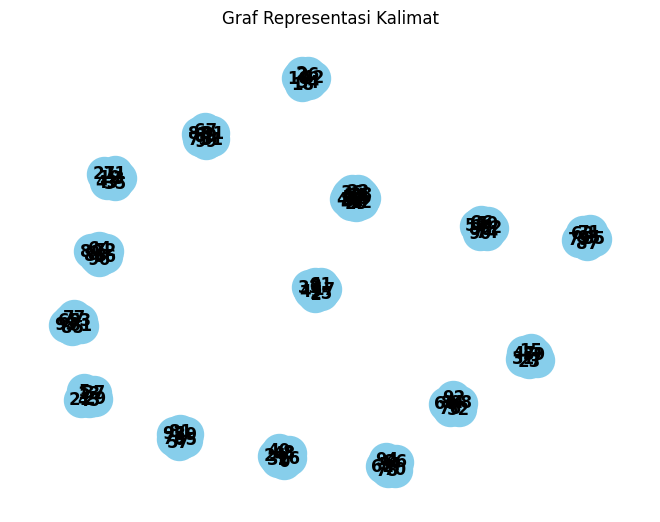

In [ ]:
graph = nx.from_numpy_array(adjacency_matrix)
pos = nx.spring_layout(graph)  # Menentukan posisi node
nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=600, edge_color='gray')
plt.title("Graf Representasi Kalimat")
plt.show()

### Centrality

In [ ]:
# Menghitung centrality
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

# Mengubah centrality menjadi DataFrame untuk ditampilkan
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

centrality_df

,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,0.060606,0.0,0.060606
1,0.060606,0.0,0.060606
2,0.050505,0.0,0.050505
3,0.050505,0.0,0.050505
4,0.111111,0.0,0.111111
...,...,...,...
95,0.050505,0.0,0.050505
96,0.050505,0.0,0.050505
97,0.050505,0.0,0.050505
98,0.060606,0.0,0.060606


## Ringkasan 1 berita

### Load Data

In [ ]:
text = df['Isi Berita'][0]

In [ ]:
print(text)

TIMESINDONESIA, JAKARTA – Di bawah kepemimpinan Presiden RI, Prabowo Subianto, Indonesia berpotensi akan bangkit sebagai "Macan Asia" yang disegani di panggung internasional. 
Hal itu dengan fokus pada kemandirian pangan dan energi, penguatan ekonomi, serta penegakan hukum yang tegas. Prabowo diharapkan mampu membawa Indonesia menuju era baru sebagai kekuatan regional yang tangguh dan berpengaruh.Advertisement
Demikian itu analisis dari Ketua Umum Poros Pemuda Indonesia (PPI), Muhlis Ali. ketika dimintai pendapatnya terkait prospek pemerintahan Prabowo, Rabu (4/9/2024) 
Menurut Muhlis, Indonesia tengah berada di ambang transformasi besar. Setelah dilantik sebagai Presiden Republik Indonesia pada 20 Oktober 2024, Prabowo Subianto diprediksi akan langsung tancap gas mewujudkan janji-janji kampanye yang dinanti rakyat Indonesia.
"Setelah 20 Oktober, Prabowo akan menjadi "media darling" dan simbol harapan rakyat. Namanya akan harum dan popularitasnya mengalami lonjakan luar biasa di awal p

### Ekstraksi Kalimat

In [ ]:
# Ekstraksi kalimat
sentences = sent_tokenize(text)

# Membuat DataFrame dari kalimat
df_sentences = pd.DataFrame(sentences, columns=["Kalimat"])
df_sentences

,Kalimat
0,"TIMESINDONESIA, JAKARTA – Di bawah kepemimpina..."
1,Hal itu dengan fokus pada kemandirian pangan d...
2,Prabowo diharapkan mampu membawa Indonesia men...
3,ketika dimintai pendapatnya terkait prospek pe...
4,Setelah dilantik sebagai Presiden Republik Ind...
5,"""Setelah 20 Oktober, Prabowo akan menjadi ""med..."
6,Namanya akan harum dan popularitasnya mengalam...
7,Membangun Demokrasi yang Sehat\nMuhlis menilai...
8,"Diberbagai kesempatan, Prabowo menegaskan pent..."
9,Dia mengapresiasi ungkapan Prabowo yang menyeb...


### Preprosesing

In [ ]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_sentence(sentence):
    sentence_cleaned = re.sub(r'[^a-zA-Z\s.]', '', sentence)  # Hanya biarkan alfabet dan titik
    sentence_cleaned = sentence_cleaned.lower()  # Ubah ke huruf kecil

    # Tokenisasi
    words = word_tokenize(sentence_cleaned)  # Memecah teks menjadi kata-kata

    # Stemming setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menghapus stopwords
    words_without_stopwords = [word for word in stemmed_words if word not in stop_words]

    # Gabungkan kembali kata-kata menjadi satu kalimat
    final_sentence = ' '.join(words_without_stopwords)

    return final_sentence

In [ ]:
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]
df_preprocessed = pd.DataFrame(preprocessed_sentences, columns=["kalimat_clean"])

df_preprocessed

,kalimat_clean
0,timesindonesia jakarta pimpin presiden ri prab...
1,fokus mandiri pangan energi kuat ekonomi tega ...
2,prabowo harap bawa indonesia tuju era kuat reg...
3,kait prospek perintah prabowo rabu muhlis indo...
4,lantik presiden republik indonesia oktober pra...
5,oktober prabowo media darling simbol harap rak...
6,nama harum popularitas alami lonjak perintah k...
7,bangun demokrasi sehat muhlis nilai prabowo mi...
8,prabowo demokrasi sehat kelola kuasa tanggung
9,apresiasi prabowo haus kuasa ganggu rugi bangsa


### TF-IDF

In [ ]:
# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_preprocessed['kalimat_clean'])

# Mengubah TF-IDF Matrix menjadi DataFrame untuk visualisasi
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=df_preprocessed.index)

# Menampilkan beberapa baris hasil TF-IDF
print("TF-IDF Matrix:")
print(tfidf_df.head())

TF-IDF Matrix:
   acara  acu  adil  adu  advertisement  agenda  ajak  akses  aktif  \
0    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
1    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
2    0.0  0.0   0.0  0.0       0.270684     0.0   0.0    0.0    0.0   
3    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   
4    0.0  0.0   0.0  0.0       0.000000     0.0   0.0    0.0    0.0   

   akuntabel  ...  umkm  unggul  uni  upaya  usaha  utama  visi  waris  \
0        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
1        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
2        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
3        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   
4        0.0  ...   0.0     0.0  0.0    0.0    0.0    0.0   0.0    0.0   

   wibawa    wujud  
0     0.0  0.00000  
1     0.0  0.00000  
2     0.0  0.00000  
3     0.0  0.00000  
4     0.

In [ ]:
tfidf_matrix.shape

(53, 310)

### Cosine Similarity

In [ ]:
# Menghitung Cosine Similarity antar kalimat
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mengubah matrix cosine similarity menjadi DataFrame untuk visualisasi
df_cosine_similarity = pd.DataFrame(cosine_sim_matrix)

# Menampilkan DataFrame cosine similarity
df_cosine_similarity

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.000000,0.050429,0.047167,0.176206,0.017372,0.000000,0.087573,0.020430,0.017495,...,0.000000,0.000000,0.031920,0.038692,0.021961,0.065492,0.053738,0.000000,0.021712,0.025508
1,0.000000,1.000000,0.049070,0.000000,0.000000,0.000000,0.000000,0.072216,0.000000,0.000000,...,0.060898,0.052426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.050429,0.049070,1.000000,0.096644,0.086662,0.113182,0.054700,0.083487,0.019005,0.016276,...,0.038404,0.000000,0.048945,0.059330,0.058326,0.121851,0.375558,0.087785,0.235729,0.047460
3,0.047167,0.000000,0.096644,1.000000,0.074781,0.024915,0.070585,0.058501,0.029300,0.025092,...,0.000000,0.000000,0.045779,0.055492,0.058423,0.093928,0.182961,0.000000,0.152789,0.036584
4,0.176206,0.000000,0.086662,0.074781,1.000000,0.173135,0.000000,0.015231,0.019651,0.016828,...,0.000000,0.000000,0.050607,0.061345,0.042247,0.125989,0.085199,0.000000,0.020884,0.049072
5,0.017372,0.000000,0.113182,0.024915,0.173135,1.000000,0.000000,0.023784,0.030685,0.026278,...,0.000000,0.000000,0.016861,0.020439,0.000000,0.000000,0.028386,0.000000,0.032611,0.000000
6,0.000000,0.000000,0.054700,0.070585,0.000000,0.000000,1.000000,0.027181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020449,0.000000,0.144057,0.000000,0.165497,0.000000
7,0.087573,0.072216,0.083487,0.058501,0.015231,0.023784,0.027181,1.000000,0.258440,0.132466,...,0.056518,0.000000,0.202665,0.191416,0.123622,0.000000,0.066651,0.000000,0.076571,0.000000
8,0.020430,0.000000,0.019005,0.029300,0.019651,0.030685,0.000000,0.258440,1.000000,0.190001,...,0.000000,0.092942,0.142431,0.246958,0.000000,0.000000,0.033382,0.000000,0.038351,0.000000
9,0.017495,0.000000,0.016276,0.025092,0.016828,0.026278,0.000000,0.132466,0.190001,1.000000,...,0.000000,0.000000,0.016981,0.020584,0.000000,0.000000,0.028587,0.000000,0.032842,0.000000


### Matrix Adjacency

In [ ]:
# Menentukan threshold untuk adjacency matrix
threshold = 0.2

# Membentuk adjacency matrix berdasarkan cosine similarity dan threshold
adj_matrix = (cosine_sim_matrix > threshold).astype(int)

# Mengisi diagonal dengan 0 agar tidak ada self-loop
np.fill_diagonal(adj_matrix, 0)

# Mengubah adjacency matrix menjadi DataFrame untuk visualisasi
df_adjacency_matrix = pd.DataFrame(adj_matrix)

# Menampilkan DataFrame adjacency matrix
df_adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Graph

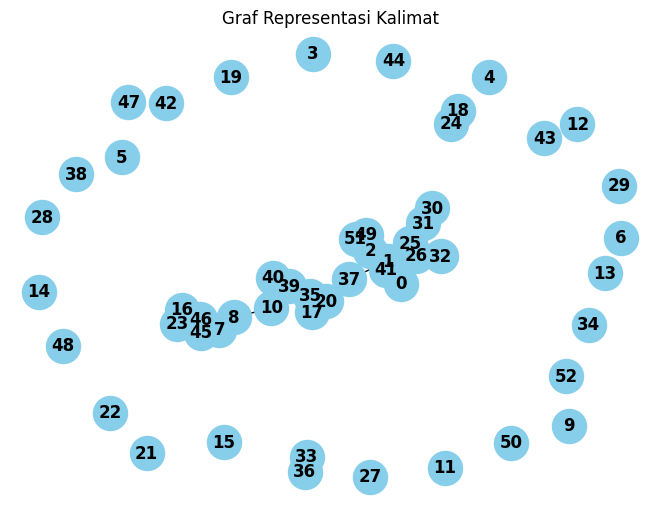

In [ ]:
# Mengubah adjacency matrix menjadi graf menggunakan NetworkX
graph = nx.from_numpy_array(adj_matrix)

# Menentukan layout graf untuk visualisasi
pos = nx.spring_layout(graph)

# Menggambar graf dengan parameter visualisasi yang diatur
# nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=600, edge_color='gray')
nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=600)


# Menambahkan judul graf
plt.title("Graf Representasi Kalimat")

# Menampilkan graf
plt.show()

In [ ]:
print(f"Number of edges: {graph.number_of_edges()}")

Number of edges: 27


In [ ]:
# Menghitung centrality
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

# Mengubah centrality menjadi DataFrame untuk ditampilkan
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

centrality_df

,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,0.019231,0.000000,0.034188
1,0.057692,0.049020,0.103846
2,0.057692,0.003017,0.061538
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000
7,0.038462,0.005279,0.083077
8,0.057692,0.050151,0.103846
9,0.000000,0.000000,0.000000


### Rangkuman kalimat

In [ ]:
# Menentukan jumlah kalimat yang akan disertakan dalam rangkuman (misalnya top 3 kalimat)
top_n = 3

# Mengurutkan kalimat berdasarkan nilai Degree Centrality, Betweenness Centrality, dan Closeness Centrality
ranked_sentences_degree = sorted(((score, idx) for idx, score in degree_centrality.items()), reverse=True)
ranked_sentences_betweenness = sorted(((score, idx) for idx, score in betweenness_centrality.items()), reverse=True)
ranked_sentences_closeness = sorted(((score, idx) for idx, score in closeness_centrality.items()), reverse=True)

# Membuat rangkuman berdasarkan top_n kalimat dengan centrality tertinggi
summary_degree = [sentences[idx] for _, idx in ranked_sentences_degree[:top_n]]
summary_betweenness = [sentences[idx] for _, idx in ranked_sentences_betweenness[:top_n]]
summary_closeness = [sentences[idx] for _, idx in ranked_sentences_closeness[:top_n]]

In [ ]:
# Menampilkan hasil rangkuman untuk masing-masing centrality
print("\nRangkuman berdasarkan Degree Centrality:")
for i, sent in enumerate(summary_degree, 1):
    print(f"{i}. {sent}")

print("\nRangkuman berdasarkan Betweenness Centrality:")
for i, sent in enumerate(summary_betweenness, 1):
    print(f"{i}. {sent}")

print("\nRangkuman berdasarkan Closeness Centrality:")
for i, sent in enumerate(summary_closeness, 1):
    print(f"{i}. {sent}")


Rangkuman berdasarkan Degree Centrality:
1. "Prabowo harus bisa menjaga integritas pemerintahannya agar tetap bersih dan bebas dari korupsi," kata Muhlis.
2. Bagi Prabowo, demokrasi tidak harus ala Barat, tapi demokrasi Indonesia punya ciri khas sendiri yang disebut Demokrasi Pancasila.
3. Pernyataan Prabowo yang menyebut Indonesia tidak perlu takut negara manapun jika berhasil berdaulat di bidang pangan dan energi, menurut Muhlis, adalah bukti komitmen Prabowo untuk memperkuat kedaulatan ekonomi nasional.

Rangkuman berdasarkan Betweenness Centrality:
1. "Prabowo harus bisa menjaga integritas pemerintahannya agar tetap bersih dan bebas dari korupsi," kata Muhlis.
2. Muhlis mengingatkan bahwa tanpa penegakan hukum yang tegas dan adil, sulit bagi pemerintah untuk membangun citra yang bersih dan berwibawa.
3. "Itu berarti Prabowo mengacu pada pandangan demokrasi modern bahwa kekuasaan harus berada di tangan rakyat dan dijalankan dengan integritas," kata Muhlis.

Rangkuman berdasarkan Cl